In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten 

In [3]:
import pandas as pd
df = pd.read_csv("/AGR/DarkSide/ML_paper/CNN/darkside_xy_recognition.csv")

In [4]:
df.head()

,x_coor,y_coor,path
0,-14.113407,-7.722085,/AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
1,0.650795,13.932798,/AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
2,8.941813,-11.791861,/AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
3,-0.615203,-3.147113,/AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
4,0.836143,-17.088459,/AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df["path"]
y = df.iloc[:,:2]

In [7]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

6177     /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
3413     /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
14054    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
906      /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
12355    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
3693     /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
14854    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
3118     /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
13346    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
11274    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
7049     /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
14759    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
6134     /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
5568     /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
12017    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
11770    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi...
13020    /AGR/DarkSide/ML_paper/CNN/heatmaps/heatmap_wi.

In [9]:
import numpy as np
import cv2
X_train_images = []
X_test_images  = []
for path in X_train:
    image = cv2.imread(path)
    image = cv2.resize(image, (128, 128))
    X_train_images.append(image)
for path in X_test:
    image = cv2.imread(path)
    image = cv2.resize(image, (128, 128))
    X_test_images.append(image)

In [10]:
X_train_images = np.array(X_train_images)

In [11]:
X_test_images = np.array(X_test_images)

In [12]:
X_train_images = X_train_images / 255 
X_test_images = X_test_images / 255 

In [13]:
X_train_images = X_train_images.reshape(X_train_images.shape[0], 128, 128, 3).astype('float32')
X_test_images = X_test_images.reshape(X_test_images.shape[0], 128, 128, 3).astype('float32')

In [14]:
X_train_images.shape

(10701, 128, 128, 3)

In [15]:
y_train_x = y_train['x_coor']

In [16]:
y_test_x = y_test['x_coor']

In [18]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(16, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mean_squared_error'])
    return model

In [19]:

model_x = convolutional_model()


model_x.fit(X_train_images, y_train_x, validation_data=(X_test_images, y_test_x), epochs=150, batch_size=200, verbose=2)

W0427 00:44:38.489595 20508 deprecation_wrapper.py:119] From C:\Users\Alexey\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0427 00:44:38.758752 20508 deprecation_wrapper.py:119] From C:\Users\Alexey\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0427 00:44:38.820837 20508 deprecation_wrapper.py:119] From C:\Users\Alexey\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0427 00:44:38.930789 20508 deprecation_wrapper.py:119] From C:\Users\Alexey\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.

Train on 10701 samples, validate on 5272 samples
Epoch 1/150
 - 108s - loss: 62.1783 - mean_squared_error: 62.1783 - val_loss: 41.5255 - val_mean_squared_error: 41.5255
Epoch 2/150
 - 101s - loss: 36.1107 - mean_squared_error: 36.1107 - val_loss: 34.9646 - val_mean_squared_error: 34.9646
Epoch 3/150
 - 103s - loss: 33.3631 - mean_squared_error: 33.3631 - val_loss: 33.8005 - val_mean_squared_error: 33.8005
Epoch 4/150
 - 100s - loss: 32.5742 - mean_squared_error: 32.5742 - val_loss: 33.9296 - val_mean_squared_error: 33.9296
Epoch 5/150
 - 99s - loss: 30.9461 - mean_squared_error: 30.9461 - val_loss: 29.3823 - val_mean_squared_error: 29.3823
Epoch 6/150
 - 100s - loss: 23.8522 - mean_squared_error: 23.8522 - val_loss: 19.1974 - val_mean_squared_error: 19.1974
Epoch 7/150
 - 99s - loss: 18.0051 - mean_squared_error: 18.0051 - val_loss: 16.9508 - val_mean_squared_error: 16.9508
Epoch 8/150
 - 98s - loss: 15.0365 - mean_squared_error: 15.0365 - val_loss: 14.5779 - val_mean_squared_error: 14

Epoch 70/150
 - 110s - loss: 0.6569 - mean_squared_error: 0.6569 - val_loss: 10.6435 - val_mean_squared_error: 10.6435
Epoch 71/150
 - 100s - loss: 0.6148 - mean_squared_error: 0.6148 - val_loss: 10.6035 - val_mean_squared_error: 10.6035
Epoch 72/150
 - 100s - loss: 0.7149 - mean_squared_error: 0.7149 - val_loss: 10.7929 - val_mean_squared_error: 10.7929
Epoch 73/150
 - 101s - loss: 0.6720 - mean_squared_error: 0.6720 - val_loss: 11.0356 - val_mean_squared_error: 11.0356
Epoch 74/150
 - 99s - loss: 0.6762 - mean_squared_error: 0.6762 - val_loss: 10.7862 - val_mean_squared_error: 10.7862
Epoch 75/150
 - 101s - loss: 0.6445 - mean_squared_error: 0.6445 - val_loss: 10.7204 - val_mean_squared_error: 10.7204
Epoch 76/150
 - 100s - loss: 0.6304 - mean_squared_error: 0.6304 - val_loss: 10.7889 - val_mean_squared_error: 10.7889
Epoch 77/150
 - 100s - loss: 0.6451 - mean_squared_error: 0.6451 - val_loss: 10.8059 - val_mean_squared_error: 10.8059
Epoch 78/150
 - 101s - loss: 0.6459 - mean_square

Epoch 139/150
 - 100s - loss: 0.3091 - mean_squared_error: 0.3091 - val_loss: 10.4958 - val_mean_squared_error: 10.4958
Epoch 140/150
 - 99s - loss: 0.3127 - mean_squared_error: 0.3127 - val_loss: 10.4127 - val_mean_squared_error: 10.4127
Epoch 141/150
 - 100s - loss: 0.3209 - mean_squared_error: 0.3209 - val_loss: 10.2642 - val_mean_squared_error: 10.2642
Epoch 142/150
 - 98s - loss: 0.3390 - mean_squared_error: 0.3390 - val_loss: 10.5046 - val_mean_squared_error: 10.5046
Epoch 143/150
 - 98s - loss: 0.3495 - mean_squared_error: 0.3495 - val_loss: 10.7583 - val_mean_squared_error: 10.7583
Epoch 144/150
 - 98s - loss: 0.3597 - mean_squared_error: 0.3597 - val_loss: 10.5028 - val_mean_squared_error: 10.5028
Epoch 145/150
 - 100s - loss: 0.3480 - mean_squared_error: 0.3480 - val_loss: 10.4117 - val_mean_squared_error: 10.4117
Epoch 146/150
 - 99s - loss: 0.3816 - mean_squared_error: 0.3816 - val_loss: 10.4049 - val_mean_squared_error: 10.4049
Epoch 147/150
 - 100s - loss: 0.3566 - mean_s

In [24]:
predictions_x = model_x.predict(X_test_images)

In [25]:
error = (1/predictions_x.shape[0])*np.sum((predictions_x - y_test_x[0]) ** 2)
print(error)

269.178063353566


In [26]:
print(predictions_x)
print(y_test_x)

[[  8.1897135]
 [ 11.115895 ]
 [ -9.45975  ]
 ...
 [ -9.502124 ]
 [  4.422628 ]
 [-12.428966 ]]
1766      9.123562
6927     12.413013
14972   -11.459702
6291    -14.803090
14413     4.747605
169      -1.752970
2861      5.387423
7598      4.840398
12352     1.469388
10928    16.711613
1087     -4.822769
3251      3.590798
12825   -14.102600
426       5.549157
6112     -2.652104
6827     -8.132812
9187     14.358940
2595     10.483336
13450    -4.400184
3169     -5.486486
9301      5.930934
5138    -12.608705
15389     8.232079
8673      1.140273
2998     10.681581
5426     -8.320603
4058     -9.015150
10428    -3.478487
10586   -15.368180
4604     14.486046
           ...    
1597      8.593550
10307   -10.280986
10234     5.570583
9452    -10.578815
1901     -7.519987
1180     -4.094398
13794    14.008546
11601     8.918249
4302    -14.181223
3006    -13.819067
10078    -5.930681
2781     -5.006196
13274    -8.562248
14532     5.301423
14280   -10.816271
10107     0.563660
7077      1

In [27]:
y_train_y = y_train['y_coor']
y_test_y = y_test['y_coor']

model_y = convolutional_model()

model_y.fit(X_train_images, y_train_y, validation_data=(X_test_images, y_test_y), epochs=150, batch_size=200, verbose=2)

Train on 10701 samples, validate on 5272 samples
Epoch 1/150
 - 122s - loss: 63.4623 - mean_squared_error: 63.4623 - val_loss: 33.4602 - val_mean_squared_error: 33.4602
Epoch 2/150
 - 135s - loss: 29.9814 - mean_squared_error: 29.9814 - val_loss: 28.9299 - val_mean_squared_error: 28.9299
Epoch 3/150
 - 126s - loss: 27.3051 - mean_squared_error: 27.3051 - val_loss: 28.0195 - val_mean_squared_error: 28.0195
Epoch 4/150
 - 129s - loss: 26.1913 - mean_squared_error: 26.1913 - val_loss: 26.9696 - val_mean_squared_error: 26.9696
Epoch 5/150
 - 123s - loss: 25.6694 - mean_squared_error: 25.6694 - val_loss: 26.7057 - val_mean_squared_error: 26.7057
Epoch 6/150
 - 121s - loss: 24.8444 - mean_squared_error: 24.8444 - val_loss: 25.4829 - val_mean_squared_error: 25.4829
Epoch 7/150
 - 117s - loss: 24.1395 - mean_squared_error: 24.1395 - val_loss: 25.2405 - val_mean_squared_error: 25.2405
Epoch 8/150
 - 104s - loss: 22.9031 - mean_squared_error: 22.9031 - val_loss: 24.5329 - val_mean_squared_error:

 - 125s - loss: 0.8279 - mean_squared_error: 0.8279 - val_loss: 9.4186 - val_mean_squared_error: 9.4186
Epoch 71/150
 - 127s - loss: 0.7910 - mean_squared_error: 0.7910 - val_loss: 9.1572 - val_mean_squared_error: 9.1572
Epoch 72/150
 - 137s - loss: 0.6942 - mean_squared_error: 0.6942 - val_loss: 9.3522 - val_mean_squared_error: 9.3522
Epoch 73/150
 - 130s - loss: 0.7384 - mean_squared_error: 0.7384 - val_loss: 9.2819 - val_mean_squared_error: 9.2819
Epoch 74/150
 - 127s - loss: 0.6791 - mean_squared_error: 0.6791 - val_loss: 9.0751 - val_mean_squared_error: 9.0751
Epoch 75/150
 - 129s - loss: 0.6656 - mean_squared_error: 0.6656 - val_loss: 9.2605 - val_mean_squared_error: 9.2605
Epoch 76/150
 - 134s - loss: 0.6394 - mean_squared_error: 0.6394 - val_loss: 9.4881 - val_mean_squared_error: 9.4881
Epoch 77/150
 - 134s - loss: 0.6257 - mean_squared_error: 0.6257 - val_loss: 9.3345 - val_mean_squared_error: 9.3345
Epoch 78/150
 - 133s - loss: 0.6387 - mean_squared_error: 0.6387 - val_loss: 

Epoch 140/150
 - 103s - loss: 0.2886 - mean_squared_error: 0.2886 - val_loss: 9.1843 - val_mean_squared_error: 9.1843
Epoch 141/150
 - 102s - loss: 0.3246 - mean_squared_error: 0.3246 - val_loss: 9.0155 - val_mean_squared_error: 9.0155
Epoch 142/150
 - 104s - loss: 0.3413 - mean_squared_error: 0.3413 - val_loss: 9.2175 - val_mean_squared_error: 9.2175
Epoch 143/150
 - 103s - loss: 0.3410 - mean_squared_error: 0.3410 - val_loss: 9.4224 - val_mean_squared_error: 9.4224
Epoch 144/150
 - 104s - loss: 0.3737 - mean_squared_error: 0.3737 - val_loss: 9.0499 - val_mean_squared_error: 9.0499
Epoch 145/150
 - 103s - loss: 0.4446 - mean_squared_error: 0.4446 - val_loss: 9.1778 - val_mean_squared_error: 9.1778
Epoch 146/150
 - 101s - loss: 0.3889 - mean_squared_error: 0.3889 - val_loss: 9.2266 - val_mean_squared_error: 9.2266
Epoch 147/150
 - 102s - loss: 0.3720 - mean_squared_error: 0.3720 - val_loss: 9.0412 - val_mean_squared_error: 9.0412
Epoch 148/150
 - 101s - loss: 0.3402 - mean_squared_erro

In [28]:
predictions_y = model_y.predict(X_test_images)

In [29]:
print(predictions_y)
print(y_test_y)

[[11.932735 ]
 [ 8.139154 ]
 [ 4.8597293]
 ...
 [-1.9972085]
 [11.299533 ]
 [-3.4804811]]
1766     11.966951
6927      8.164692
14972    10.038128
6291      4.564846
14413    -8.589212
169     -17.225407
2861     -8.085382
7598     -5.430155
12352   -17.290897
10928    -4.507370
1087     -3.044689
3251     -0.260119
12825     3.398838
426     -14.444721
6112     -3.533971
6827    -11.772320
9187      5.701873
2595     10.189541
13450    -2.949221
3169      0.512180
9301    -12.991669
5138      2.278030
15389    -9.776111
8673    -14.017062
2998     -8.914213
5426    -10.294477
4058     -1.940813
10428    17.501333
10586    -3.050938
4604     -4.468014
           ...    
1597     -1.313543
10307     4.818134
10234   -15.030802
9452     13.755835
1901     -6.034544
1180     12.374773
13794     8.463385
11601    11.131618
4302     -7.986553
3006      6.073563
10078   -10.953822
2781     -4.525094
13274    13.763906
14532    -8.475270
14280     9.349010
10107    11.142964
7077     10.31963

In [30]:
model_x.save("model_x_dimension.h5")

In [31]:
model_y.save("model_y_dimension.h5")

In [35]:
from matplotlib import pylab as plt

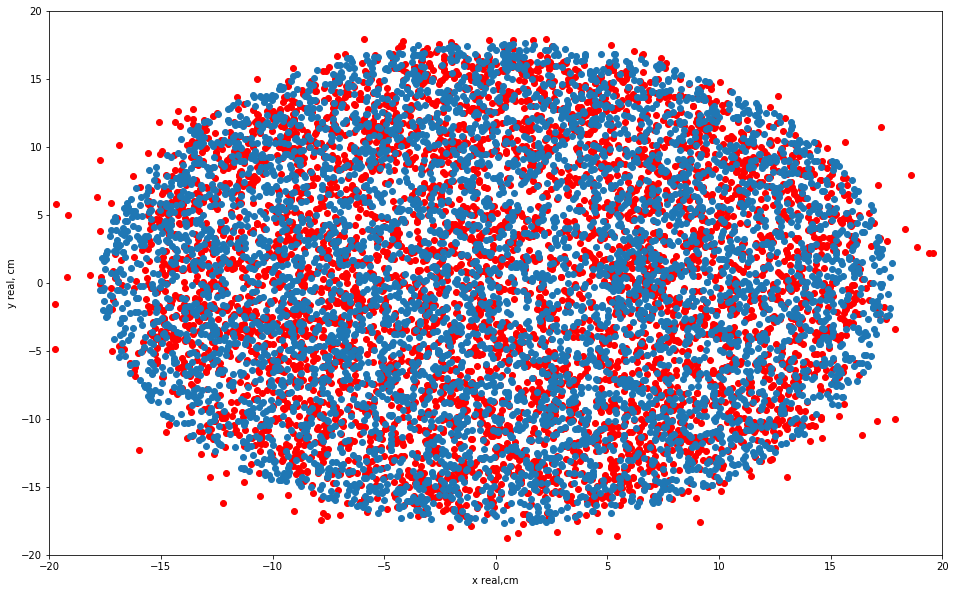

In [39]:
fig = plt.figure(figsize=(16, 10))
plt.scatter(predictions_x, predictions_y, color='red')
plt.scatter(y_test_x, y_test_y)
plt.xlim (-20, 20)
plt.ylim (-20, 20)
plt.xlabel('x real,cm')
plt.ylabel('y real, cm')
plt.show()

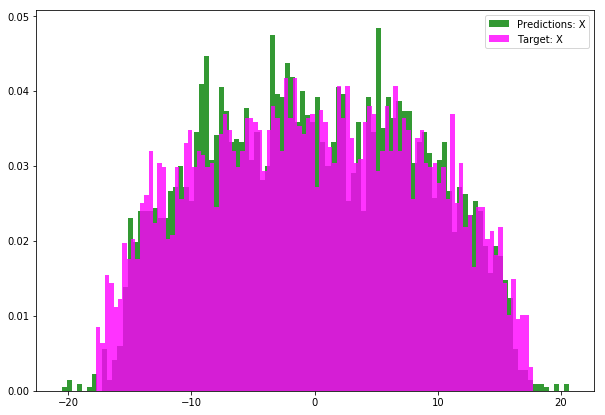

In [54]:
fig = plt.figure(figsize=(10, 7))
plt.hist(predictions_x,color='green',histtype="stepfilled",
            bins=100, alpha=0.8, density=True,label='Predictions: X')
plt.hist(y_test_x,histtype="stepfilled",color='magenta',
            bins=100, alpha=0.8, density=True,label='Target: X')
plt.legend()
plt.show()

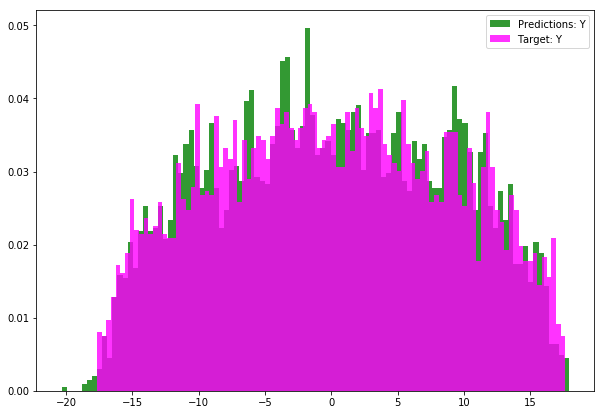

In [55]:
fig = plt.figure(figsize=(10, 7))
plt.hist(predictions_y,color='green',histtype="stepfilled",
            bins=100, alpha=0.8, density=True,label='Predictions: Y')
plt.hist(y_test_y,histtype="stepfilled",color='magenta',
            bins=100, alpha=0.8, density=True,label='Target: Y')
plt.legend()
plt.show()

### Код Айдара

In [56]:
y_test.head()

,x_coor,y_coor
1766,9.123562,11.966951
6927,12.413013,8.164692
14972,-11.459702,10.038128
6291,-14.803090,4.564846
14413,4.747605,-8.589212


In [60]:
predictions = pd.DataFrame({"x_coor" : predictions_x, "y_coor":predictions_y}

In [74]:
predictions.head()

,x_coor,y_coor
0,8.189713,11.932735
1,11.115895,8.139154
2,-9.459750,4.859729
3,-14.258766,6.711326
4,4.693058,-9.287694


In [81]:
y_test_reindex = y_test.reset_index()
y_test_reindex.drop(columns='index',inplace=True)
y_test_reindex.head()

,x_coor,y_coor
0,9.123562,11.966951
1,12.413013,8.164692
2,-11.459702,10.038128
3,-14.803090,4.564846
4,4.747605,-8.589212


In [66]:
import math

In [83]:
diff_x_y = abs(predictions - y_test_reindex)
print(diff_x_y)

         x_coor     y_coor
0      0.933848   0.034216
1      1.297118   0.025537
2      1.999951   5.178399
3      0.544324   2.146480
4      0.054547   0.698482
5      0.376196   0.098581
6      1.928965   9.719456
7      0.565093   0.575769
8      2.232258   3.384070
9      1.570964   2.713932
10     0.737869   1.223295
11     0.025573   0.189971
12     1.680360   2.064050
13     0.580276   0.111366
14     0.002029   0.839518
15     0.381870   0.074991
16     0.564320   0.543359
17     1.066862   0.366835
18     0.316879   0.551266
19     0.107397   0.180299
20     0.202457   0.663114
21     1.410251   1.337608
22     0.549671   1.035381
23     2.063273   1.919544
24     0.081832   0.739550
25     3.902376   5.879484
26     0.036114   0.932518
27     0.138820   1.164684
28     2.725527   1.254391
29    22.662586  11.014740
...         ...        ...
5242   0.100099   0.756909
5243   0.660738   0.041655
5244   0.187156   1.408705
5245   2.988169  24.304794
5246   0.001016   0.179656
5

In [84]:
# x_mesh = y_test.iloc[:,0]
# y_mesh = y_test.iloc[:,1]
x_mesh = []
y_mesh = []
xdiff = diff_x_y.iloc[:,0]
ydiff = diff_x_y.iloc[:,1]
intensity_list = []
bad_intensity_list = []
bad_x_test = []
bad_y_test = []
member = 0
for i in range (len(xdiff)):
    member = math.sqrt(xdiff.iloc[i]*xdiff.iloc[i]+ydiff.iloc[i]*ydiff.iloc[i])
    if member > 7:
        print(i)
        bad_intensity_list.append(member)
        bad_x_test.append(y_test.iloc[i][0])
        bad_y_test.append(y_test.iloc[i][1])
        member = 0
    else:
        intensity_list.append(member)
        x_mesh.append(y_test.iloc[i][0])
        y_mesh.append(y_test.iloc[i][1])

6
25
29
59
96
98
101
137
148
149
163
193
208
280
290
291
302
308
356
364
388
397
404
412
421
427
468
484
497
546
554
564
571
583
610
632
648
658
660
662
669
695
713
722
731
752
766
794
800
802
818
820
828
829
838
855
878
892
898
899
913
918
954
955
963
967
1032
1034
1038
1061
1067
1093
1122
1133
1134
1155
1164
1171
1176
1180
1202
1253
1264
1269
1274
1275
1281
1293
1295
1296
1363
1391
1417
1419
1423
1424
1425
1445
1450
1461
1462
1474
1500
1515
1520
1577
1598
1611
1618
1620
1667
1669
1690
1697
1704
1707
1714
1729
1732
1736
1740
1759
1762
1793
1801
1805
1809
1811
1813
1833
1862
1871
1879
1885
1890
1892
1901
1902
1910
1929
1938
1949
1968
1973
1979
1991
2001
2012
2014
2030
2046
2055
2060
2062
2081
2083
2095
2098
2114
2138
2139
2153
2179
2191
2236
2279
2283
2291
2308
2326
2370
2374
2396
2410
2454
2480
2497
2508
2518
2524
2538
2569
2572
2579
2586
2587
2590
2593
2607
2619
2640
2650
2660
2662
2670
2675
2676
2683
2690
2693
2699
2712
2723
2749
2760
2793
2824
2844
2864
2880
2884
2888
2897
2942
297

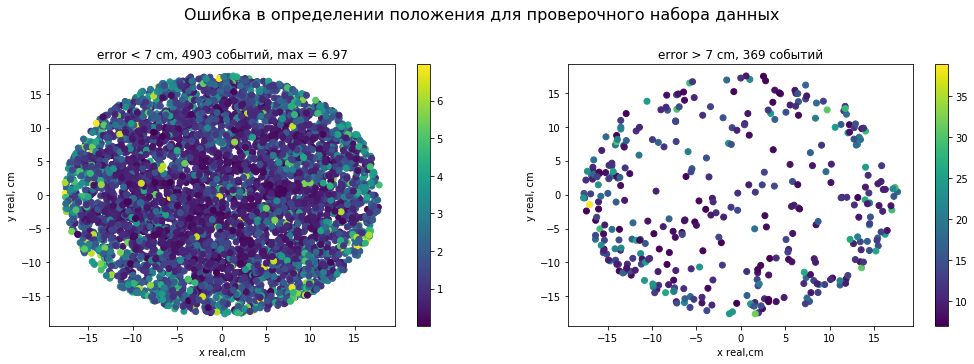

In [85]:
fig = plt.figure(figsize=(16, 10))
plt.suptitle('Ошибка в определении положения для проверочного набора данных', fontsize=16)
plt.subplots_adjust(right=0.95, bottom=0.1, top=0.9)
plt.subplot(221)
plt.title('error < 7 cm, {0} событий, max = {1}'.format(len(x_mesh),round(max(intensity_list),2)))
plt.xlabel('x real,cm')
plt.ylabel('y real, cm')
plt.scatter(x_mesh, y_mesh, c=intensity_list)
plt.colorbar()
plt.subplot(222)
plt.title('error > 7 cm, {0} событий'.format(len(bad_x_test)))
plt.xlabel('x real,cm')
plt.ylabel('y real, cm')
plt.scatter(bad_x_test, bad_y_test, c=bad_intensity_list)
plt.colorbar()
